# Comparison of feedback groups

In [1085]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

In [140]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1338]:
df_all = pd.read_csv('/Users/belinskaia/Desktop/CBI/nfb_old_csv/alpha_old_script/all.csv')
df_all.head(3)

,metric,metric_type,block_number,threshold_factor,block_name,subj_id
0,2.623608,magnitude,1,2.5,Baseline0,1
1,0.194311,n_spindles,1,2.5,Baseline0,1
2,0.101000,duration,1,2.5,Baseline0,1


We were not interested in the dynamics within each 2-minute training block, so we will group the observations into blocks.

In [1349]:
group_signal = df_all.groupby(['block_name', 'metric_type', 'subj_id','block_number']).mean()['metric']
group_signal

block_name  metric_type  subj_id  block_number
FB0         amplitude    2        6               9.391494
                                  8               7.594289
                                  10              8.255711
                                  12              7.567940
                                  14              7.366757
                                                    ...   
FBMock      n_spindles   26       6               0.138874
                                  8               0.236086
                                  10              0.187480
                                  12              0.416623
                                  14              1.090164
Name: metric, Length: 1920, dtype: float64

In [1350]:
fin = pd.DataFrame(data = group_signal).reset_index()

In [1361]:
fin_norm.to_csv('all_norm_23_02_22.csv', index=False)

### Order factor

The order of conditions is an important factor for within-subject design through the influence of previous sessions.Therefore, it is important for us to indicate not only the type of feedback, but also the serial number of the condition, in order to consider it as a separate factor.

In [1366]:
def order_fun(a):
    if a == 6:
        return(1)
    elif a == 21:
        return(2)
    elif a == 36:
        return(3)
    else:
        return(4)

In [1367]:
for i, row in fin_norm.iterrows():
    subj_id = row['subj_id']
    block_name = row['block_name']
    min_block_in_fb = fin_norm.loc[(fin['block_name']== block_name)&(fin_norm['subj_id']== subj_id)].block_number.min()
    fin_norm.at[i,'order'] = order_fun(min_block_in_fb)
fin_norm.head(3)

,block_name,metric_type,subj_id,block_number,metric,six,norm,order
240,FB0,magnitude,2,6,3.049945,3.049945,1.000000,1.0
241,FB0,magnitude,2,8,2.855223,3.049945,0.936155,1.0
242,FB0,magnitude,2,10,2.823622,3.049945,0.925794,1.0


In [1374]:
fin_amp_norm = fin_norm.loc[fin_norm['metric_type'].isin(['amplitude'])]
fin_dur_norm = fin_norm.loc[fin_norm['metric_type'].isin(['duration'])]
fin_mag_norm = fin_norm.loc[fin_norm['metric_type'].isin(['magnitude'])]
fin_spin_norm = fin_norm.loc[fin_norm['metric_type'].isin(['n_spindles'])]

In [1375]:
fin_mag_norm_1 = fin_mag_norm.loc[fin_mag_norm['order'].isin([1])]
fin_mag_norm_2 = fin_mag_norm.loc[fin_mag_norm['order'].isin([2])]
fin_mag_norm_3 = fin_mag_norm.loc[fin_mag_norm['order'].isin([3])]
fin_mag_norm_4 = fin_mag_norm.loc[fin_mag_norm['order'].isin([4])]

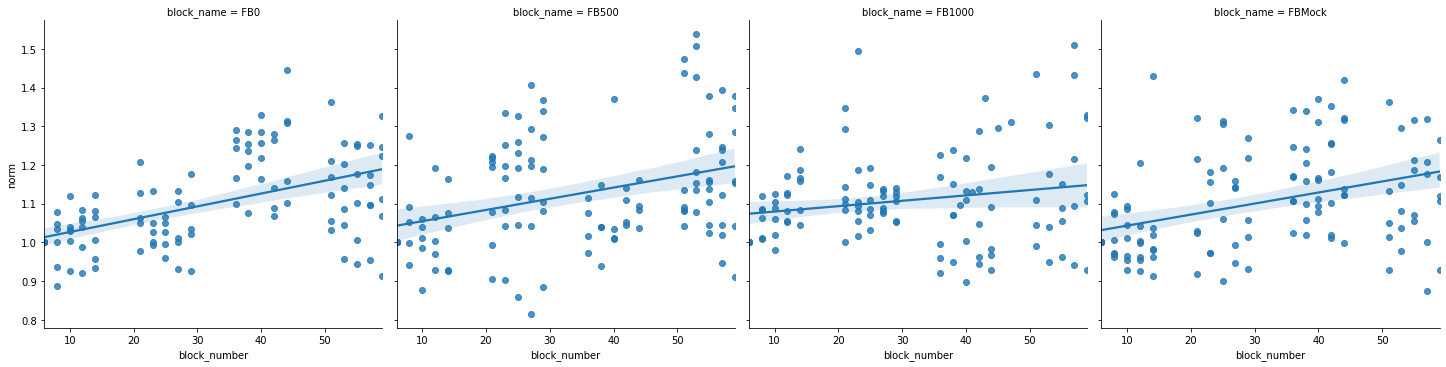

In [1378]:
sns.lmplot(x="block_number", y="norm", col="block_name", col_order=['FB0', 'FB500', 'FB1000', 'FBMock'], data=fin_mag_norm)



### Analysis of variance interaction between factors (ANOVA)

We were interested not only in the influence of the delay and order factors on the metrics of alpha rhythm change, but also in the interaction. In the analysis of variance (ANOVA) tests, the interactions of variables within a dataset are examined searching for two types of effects: main and interaction. 

In [141]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_dur).fit()
dur_aov_table = sm.stats.anova_lm(model, typ=2)
dur_aov_table

,sum_sq,df,F,PR(>F)
"C(order, Sum)",0.012622,3.0,4.737476,0.002898
"C(block_name, Sum)",0.001188,3.0,0.445736,0.720437
"C(order, Sum):C(block_name, Sum)",0.028507,9.0,3.566720,0.000270
Residual,0.394301,444.0,NaN,NaN


In [142]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_dur).fit()
dur_aov_table = sm.stats.anova_lm(model, typ=3)
dur_aov_table

,sum_sq,df,F,PR(>F)
Intercept,6.188153,1.0,6968.130721,1.524099e-273
"C(order, Sum)",0.009613,3.0,3.608057,1.342452e-02
"C(block_name, Sum)",0.000837,3.0,0.314072,8.152157e-01
"C(order, Sum):C(block_name, Sum)",0.028507,9.0,3.566720,2.697109e-04
Residual,0.394301,444.0,NaN,NaN


In [143]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_mag).fit()
mag_aov_table = sm.stats.anova_lm(model, typ=3)
mag_aov_table

,sum_sq,df,F,PR(>F)
Intercept,6673.132260,1.0,631.564352,2.447204e-87
"C(order, Sum)",80.585195,3.0,2.542271,5.577328e-02
"C(block_name, Sum)",17.572878,3.0,0.554383,6.454356e-01
"C(order, Sum):C(block_name, Sum)",439.615701,9.0,4.622943,7.344780e-06
Residual,4691.320393,444.0,NaN,NaN


In [144]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_spin).fit()
spin_aov_table = sm.stats.anova_lm(model, typ=3)
spin_aov_table

,sum_sq,df,F,PR(>F)
Intercept,96.691268,1.0,154.901641,1.035151e-30
"C(order, Sum)",12.910949,3.0,6.894546,1.514435e-04
"C(block_name, Sum)",4.953296,3.0,2.645098,4.868764e-02
"C(order, Sum):C(block_name, Sum)",26.623008,9.0,4.738964,4.913670e-06
Residual,277.149567,444.0,NaN,NaN


In [145]:
model = ols("metric ~ C(order,Sum) + C(block_name,Sum) + C(order,Sum)*C(block_name,Sum)", data=fin_amp).fit()
amp_aov_table = sm.stats.anova_lm(model, typ=3)
amp_aov_table

,sum_sq,df,F,PR(>F)
Intercept,45080.785474,1.0,1737.011436,1.459282e-155
"C(order, Sum)",32.028883,3.0,0.411369,7.449140e-01
"C(block_name, Sum)",2.497376,3.0,0.032076,9.922748e-01
"C(order, Sum):C(block_name, Sum)",1607.050231,9.0,6.880154,2.701646e-09
Residual,11523.164636,444.0,NaN,NaN


### FDR_correction
When we make this many comparisons, it is important to adjust for multiple comparisons to avoid any significance of the differences being due to chance.

In [ ]:
#FDR_correction
import statsmodels.sandbox.stats.multicomp as multicomp
pval_corrected = multicomp.multipletests(reg_coef_df['p_value'], method='fdr_bh', is_sorted=False, returnsorted=False)[1]
reg_coef_df['pval_corrected'] = list(pval_corrected)

One can see that all changes in rhythm characteristics (magnitude, number of spindles, amplitude and duration) significantly depend on the interaction of factors NFB latency and Order of condition (all four p-values less than 0,01 after FDR correction). 

The main effect of the Order also appears to be significant or marginally significant for all characteristics, except for the amplitude  (magnitude p-value - 0,05; number of spindles p-value - 0,0001; duration p-value - 0,01, FDR corrected). Interestingly, the number of spindles appears to be most reliably influenced by the Order factor. 

In addition, we see the significance of the feedback latency factor for the number of bursts (p-value 0,04), which agrees with our earlier observation (Ossadtchi et al, 2017) that the incidence rate of the alpha bursts is the most sensitive rhythm characteristics in this type of the alpha neurofeedback training.  


### T-test
We performed pairwise comparison of changes in the average gain of different morphological descriptors between sessions using the t-test to find out in which of sessions 1, 2, 3 or 4 the most significant changes occurred in all subjects regardless of the feedback latency factor. 

Стьюдент и проверка гипотез попарно

In [166]:
first = fin_spin.loc[fin_spin['order'].isin([1])]
second = fin_spin.loc[fin_spin['order'].isin([2])]
third = fin_spin.loc[fin_spin['order'].isin([3])]
forth = fin_spin.loc[fin_spin['order'].isin([4])]

In [225]:
fin_spin = fin.loc[fin['metric_type'].isin(['duration'])]

In [226]:
third = fin_spin.loc[fin_spin['order'].isin([3])]
first_fb0 = third.loc[third['block_name'].isin(['FB0'])]
first_fb500 = third.loc[third['block_name'].isin(['FB500'])]
first_fb1000 = third.loc[third['block_name'].isin(['FB1000'])]
first_fbMock = third.loc[third['block_name'].isin(['FBMock'])]

In [227]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(first_fb0['metric'], first_fb1000['metric'],  equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print('H0 не верна, группы отличаются')
else:
    print('Н0 верна, группы не отличаются')

P-value: 0.11504956636370899
Н0 верна, группы не отличаются


### Linear regression 

We also calculated the difference in the slopes of the curves for linear regression, but the types of feedback still did not differ.

In [93]:
#Linear regres coef 
from scipy import stats
reg_coef = []
fb_types = list(fin.block_name.unique())

for fb_type in fb_types:
    a =[]
    x = fin_mag.loc[fin_mag['block_name'] == fb_type].block_number
    y = fin_mag.loc[fin_mag['block_name'] == fb_type].metric
    a.append(fb_type)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    a.append(slope)
    a.append(intercept)
    a.append(r_value) 
    a.append(p_value) 
    a.append(std_err) 
    reg_coef.append(a) 

In [94]:
#Linear regres coef dataframe
reg_coef_df = pd.DataFrame(reg_coef) 
reg_coef_df = reg_coef_df.rename(columns={0: 'type', 1: "slope", 2: "intercept", 3: "r_value", 4: "p_value", 5: "std_err"})
reg_coef_df.reset_index(drop=True, inplace=True)

In [95]:
reg_coef_df

,type,slope,intercept,r_value,p_value,std_err
0,FB0,0.032449,3.179468,0.153402,0.101674,0.019663
1,FB1000,0.046045,2.491029,0.275056,0.002930,0.015140
2,FB500,0.020293,3.396784,0.071572,0.447189,0.026604
3,FBMock,-0.002529,3.636057,-0.037077,0.694029,0.006412


Due to all these results, we decided not to use this paradigm :)